<a href="https://colab.research.google.com/github/white0825/2022S-ML/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [1]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

## 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd

In [4]:
path = 'heart_clean.csv' # 제공된 csv 파일 사용
df = pd.read_csv(path)

In [51]:
df.head()

(710, 6)

## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (568, 5)
y_train's shape :  (568,)

X_val's shape :  (71, 5)
y_val's shape :  (71,)

X_test's shape :  (71, 5)
y_test's shape :  (71,)




---



## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



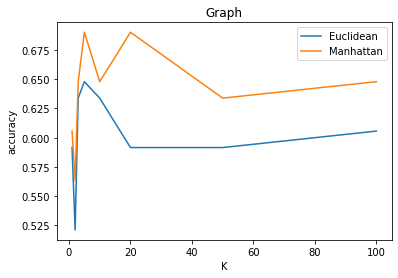

accuracy = 0.690


In [ ]:
### 문제 1 ###
## 코드 작성 ##
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt

Karray=[1,2,3,5,10,20,50,100]
score_list1 = []
score_list2 = []

for i in Karray:
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski') #유클라디안

  knn.fit(X_train, y_train)

  y_pred=knn.predict(X_val)
  score = metrics.accuracy_score(y_pred, y_val)
  score_list1.append(score)

for i in Karray:
  knn = KNeighborsClassifier(n_neighbors=i, p=1, metric='minkowski') #맨하턴

  knn.fit(X_train, y_train)

  y_pred=knn.predict(X_val)
  score = metrics.accuracy_score(y_pred, y_val)
  score_list2.append(score)

plt.plot(Karray,score_list1)
plt.plot(Karray,score_list2)

plt.legend(['Euclidean','Manhattan'])

plt.xlabel('K')
plt.ylabel('accuracy')

plt.title("Graph")

plt.show()

#최적의 파라미터로 test set 사용하기

knn = KNeighborsClassifier(n_neighbors=5, p=1, metric='minkowski') #맨하턴

knn.fit(X_train, y_train)

y_pred=knn.predict(X_test)
print('accuracy = %.3f' %accuracy_score(y_test,y_pred))






**설명 작성**  
- 최적의 파라미터: 맨하턴 거리, K=5
- 설명:
전체적으로 맨하턴 거리척도에서 Accuracy가 높았으며,
K=5 일 때 가장 Accuracy가 높았기에 해당 파라미터를 채택하였습니다. 



---



## 문제2 SVM


- Scikit-learn 라이브러리를 이용하여 SVM의 최적의 파라미터를 찾는다.
    - Kernel trick 중 최소 두개를 비교한다.
    - 최적의 파라미터 C값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 C값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.


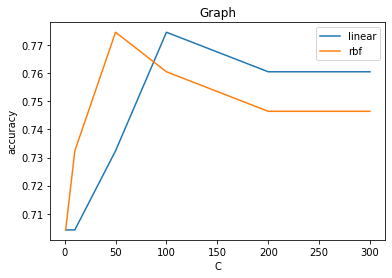

linear, C=100 : accuracy = 0.761
rbf, C=50 : accuracy = 0.775


In [20]:
### 문제 2 ###
## 코드 작성 ##

from sklearn.metrics import accuracy_score
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt

Carray = [1,10,50,100,200,300] # C 파라미터에 들어갈 값 정의

score_list1 = []
score_list2 = []

for i in Carray:
  svm_clf=svm.SVC(kernel='linear',C=i) #linear kernel

  svm_clf.fit(X_train, y_train)

  y_pred=svm_clf.predict(X_val)
  score=accuracy_score(y_val,y_pred)
  score_list1.append(score)
#-------------------------------------------------------------
  svm_clf=svm.SVC(kernel='rbf',C=i) #rbf kernel

  svm_clf.fit(X_train, y_train)

  y_pred=svm_clf.predict(X_val)
  score=accuracy_score(y_val,y_pred)
  score_list2.append(score)

plt.plot(Carray,score_list1) #plot
plt.plot(Carray,score_list2)

plt.legend(['linear','rbf'])

plt.xlabel('C')
plt.ylabel('accuracy')

plt.title("Graph")

plt.show()

#최적의 파라미터로 test set 사용하기

svm_clf=svm.SVC(kernel='linear',C=100)

svm_clf.fit(X_train, y_train)

y_pred=svm_clf.predict(X_test)
print('linear, C=100 : accuracy = %.3f' %accuracy_score(y_test,y_pred))

svm_clf=svm.SVC(kernel='rbf',C=50)

svm_clf.fit(X_train, y_train)

y_pred=svm_clf.predict(X_test)
print('rbf, C=50 : accuracy = %.3f' %accuracy_score(y_test,y_pred))

**설명 작성**  
- 최적의 파라미터: 'linear' kernel에 C=100, 'rbf' kener에 C=50
- 설명: Linear kernel에서는 C=100, rbf kernel에서는 C=50일 때 가장 accuracy가 높게 책정되어 두 경우 모두 test set으로 검증해 보았다. 



---



## 문제3 Cross validation with Random Forest
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

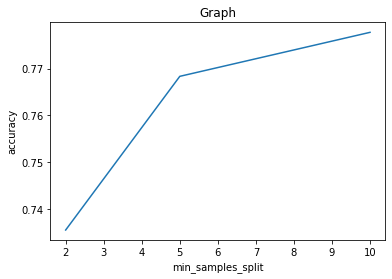

accuracy = 0.732


In [56]:
### 문제 3-1 ###
## 코드 작성 ##
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # 1:9로 set split


Parray = [2,3,5,10] #min_samples_split Array

score_list = []

for i in Parray: #random forest 학습 루프
  rf_clf = RandomForestClassifier(random_state=1,min_samples_split=i)
  scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
  score_list.append(scores.mean()) #Array에 평균 정확도 저장

plt.plot(Parray,score_list) # plot

plt.xlabel('min_samples_split')
plt.ylabel('accuracy')

plt.title("Graph")

plt.show()

rf_clf = RandomForestClassifier(random_state=1,min_samples_split=10)

rf_clf.fit(X_train, y_train)

y_pred=rf_clf.predict(X_test) #test set 이용
print('accuracy = %.3f' %accuracy_score(y_test,y_pred))


**설명 작성**  
- test accuracy: 0.732
- 최적의 파라미터: min_samples_split = 10
- 설명: 노드를 분할하기 위한 최소한의 샘플 데이터수인 min_samples_split에 따라 최적화 하였다.



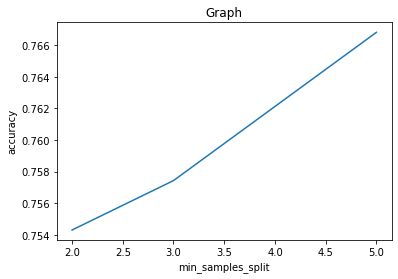

accuracy = 0.732


In [57]:
### 문제 3-2 ###
## 코드 작성 ##

from sklearn.model_selection import LeaveOneOut

Parray = [2,3,5] #min_samples_split Array

score_list = []


for i in Parray:#random forest 학습 루프
  rf_clf = RandomForestClassifier(random_state=1,min_samples_split=i)
  cv=LeaveOneOut()
  scores = cross_val_score(rf_clf, X_train, y_train, cv=cv) #LOOCV (cv=LeaveOneOut())
  score_list.append(scores.mean())#Array에 평균 정확도 저장

plt.plot(Parray,score_list) # plot

plt.xlabel('min_samples_split')
plt.ylabel('accuracy')

plt.title("Graph")

plt.show()

rf_clf = RandomForestClassifier(random_state=1,min_samples_split=5)

rf_clf.fit(X_train, y_train)

y_pred=rf_clf.predict(X_test) #test set 이용
print('accuracy = %.3f' %accuracy_score(y_test,y_pred))

**설명 작성**  
- test accuracy: 0.732
- 최적의 파라미터: min_samples_split = 5
- 설명: 노드를 분할하기 위한 최소한의 샘플 데이터수인 min_samples_split에 따라 최적화 하였다. 실행 시간이 오래 걸려 파라미터는 2,3,5 만 테스트 하였다.



---



## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [58]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [59]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [60]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [61]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Pearson Correlation
- seaborn 패키지를 사용하여 pearson correlation heatmap을 그린다.
- heatmap을 확인한 후 각 feature들 간 어떠한 관계가 있는지 아래의 텍스트 셀에 서술한다.    
- target과 연관성이 높은 feature의 column들을 아래의 텍스트 셀에 기술한다.
- 기술한 columns들과 target column을 포함하여 DataFrame을 만들고 **이후 모든 문제에서는 이 DataFrame을 사용한다**.

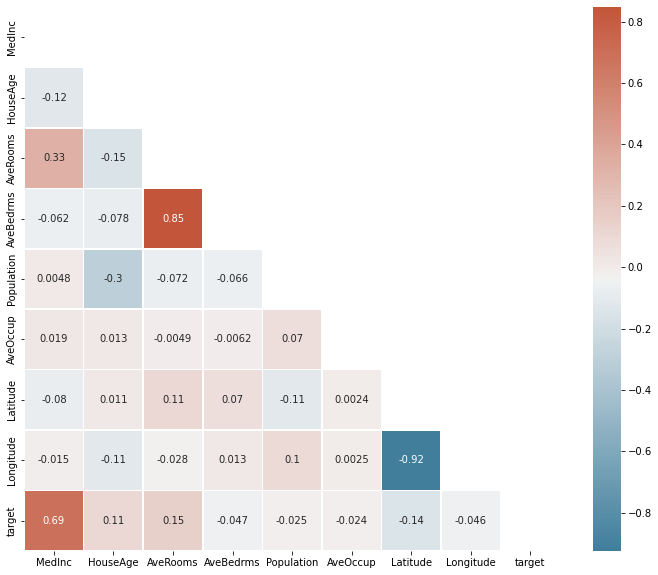

In [63]:
### 문제 4-1 ###
# correlation map 작성 후 plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Correlation between different variables
#
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap,linewidths=.5)

- **Feature들 간 관계 서술**  
  * AveRooms와 AveBedrms는 강한 양의 선형 관계가 있다.
  * AveRooms와 AveBedrms는 강한 양의 선형 관계가 있다.
  * Target과 MedInc는 뚜렷한 양의 선형 관계가 있다.
  * Target과 HouseAge, AveRooms는 약한 양의 선형 관계가 있다.
  * Target과 Latitude는 약한 음의 선형 관계가 있다.

- **최종 선택한 feature들**  
  답: MedInc, HouseAge, AveRooms, Latitude

In [90]:
### 문제 4-1 ###
# 새 dataframe 만들기

n_df = df[['MedInc','HouseAge','AveRooms','Latitude','target']] #data frame columns추출


print(n_df.head())

   MedInc  HouseAge  AveRooms  Latitude  target
0  8.3252      41.0  6.984127     37.88   4.526
1  8.3014      21.0  6.238137     37.86   3.585
2  7.2574      52.0  8.288136     37.85   3.521
3  5.6431      52.0  5.817352     37.85   3.413
4  3.8462      52.0  6.281853     37.85   3.422


### 문제 4-2: MSE, r2 score
- Scikit-learn 라이브러리의 LinearRegression 모델을 사용한다.
- train data는 test data를 제외한 **90%의 데이터를 사용**해야한다.
- **Mean Square Error(MSE)**와 **r2 score**를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.
- Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 텍스트 셀에 서술한다.

In [101]:
### 문제 4-2 ###
## 코드 작성 ##

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X = n_df.drop('target', axis=1)
y = n_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

line_model = LinearRegression()
line_model.fit(X_train, y_train)

y_pred = line_model.predict(X_train)
train_pred_MSE=mean_squared_error(y_pred, y_train, squared = True)
train_pred_r2=r2_score(y_train, y_pred)

y_pred = line_model.predict(X_test)
test_pred_MSE=mean_squared_error(y_pred, y_test, squared = True)
test_pred_r2=r2_score(y_test, y_pred)

print('MSE train set prediction 결과 : ',train_pred_MSE)
print('MSE test set prediction 결과 : ',test_pred_MSE)
print('r2 score train set prediction 결과 : ',train_pred_r2)
print('r2 score test set prediction 결과 : ',test_pred_r2)

MSE train set prediction 결과 :  0.6365198439281669
MSE test set prediction 결과 :  0.6767490261698378
r2 score train set prediction 결과 :  0.521888700012028
r2 score test set prediction 결과 :  0.49254328298950123


**Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 서술**   
답: train set prediction 결과와 test set prediction 결과가 근소한 차이로 같기 때문에 overfit과 underfit이 거의 없다고 볼 수 있다.

### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,10]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [102]:
### 문제 4-3 ###
## 코드 작성 ##

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=42) ## 8:8:1 로 split


from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error


alpha = [0.0001, 0.001,0.01,0.1,10]

score_list1 = []
score_list2 = []

# Ridge Regression

for i in alpha:
  model = Ridge(alpha=i).fit(X_train,y_train)

  y_pred = model.predict(X_val)

  score=r2_score(y_val, y_pred)
  score_list1.append(score)

# Lasso Regression

for i in alpha:
  model = Lasso(alpha=i).fit(X_train,y_train)

  y_pred = model.predict(X_val)

  score=r2_score(y_val, y_pred)
  score_list2.append(score)




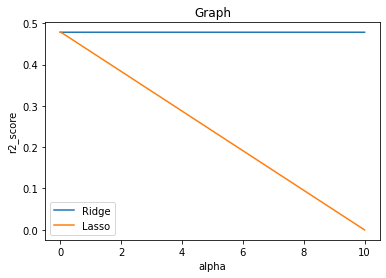

In [103]:
### 문제 4-3 ###
## 그래프 작성 ##

plt.plot(alpha,score_list1)
plt.plot(alpha,score_list2)

plt.legend(['Ridge','Lasso'])

plt.xlabel('alpha')
plt.ylabel('r2_score')

plt.title("Graph")

plt.show()

- Rridge regression 모델 최적의 alpha 값: 모두 같았다.
- Lasso regression 모델 최적의 alpha 값: 0.0001

In [104]:
### 문제 4-3 ###
# 최종 결과 출력

#train set과 val set 합치기
nX_train=pd.concat([X_train,X_val])
ny_train=pd.concat([y_train,y_val])

model = Lasso(alpha=0.0001).fit(nX_train,ny_train)
y_pred = model.predict(X_test)

score=r2_score(y_test, y_pred)
print(score)


0.4925473091950594
